  Class       Drink  Rank      Amount  Count
0     A        Coke     7  (100, 200)    200
1     B       Pepsi     6   (200, 10)    100
2     C         7Up     5   (200, 10)    100
3     D      Sprite     4  (400, 100)    200
4     E       Latte     3   (800, 10)    100
5     F    Espresso     2   (800, 10)    100
6     G  Cappuccino     1  (900, 400)    200


(array([ 6.,  1.,  0.,  1.,  4.,  5.,  2., 11.,  8.,  7.,  7.,  7., 13.,
         6.,  9., 10., 12., 11., 11.,  8., 12.,  4.,  4.,  4.,  4.,  7.,
         3.,  5.,  3.,  4.,  4.,  2.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,
         1.]),
 array([  55.62763862,  108.87753318,  162.12742775,  215.37732231,
         268.62721687,  321.87711143,  375.12700599,  428.37690055,
         481.62679511,  534.87668967,  588.12658423,  641.37647879,
         694.62637335,  747.87626791,  801.12616247,  854.37605703,
         907.62595159,  960.87584615, 1014.12574072, 1067.37563528,
        1120.62552984, 1173.8754244 , 1227.12531896, 1280.37521352,
        1333.62510808, 1386.87500264, 1440.1248972 , 1493.37479176,
        1546.62468632, 1599.87458088, 1653.12447544, 1706.37437   ,
        1759.62426456, 1812.87415912, 1866.12405368, 1919.37394825,
        1972.62384281, 2025.87373737, 2079.12363193, 2132.37352649,
        2185.62342105]),
 <a list of 1 Patch objects>)

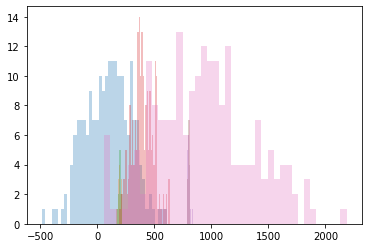

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec as w2v
import gensim
from collections import Counter
import nltk
import re
import sklearn.manifold
import multiprocessing
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plot

data=([('A','Coke',7,(100,200),200),
    ('B','Pepsi',6,(200,10),100),
    ('C','7Up',5,(200,10),100),
    ('D','Sprite',4,(400,100),200),
    ('E','Latte',3,(800,10),100),
    ('F','Espresso',2,(800,10),100),
    ('G','Cappuccino',1,(900,400),200)])

df=pd.DataFrame(data,columns=['Class','Drink','Rank','Amount','Count'])
print(df)

x0=np.random.normal(100,200,200)
x1=np.random.normal(200,10,100)
x2=np.random.normal(200,10,100)
x3=np.random.normal(400,100,200)
x4=np.random.normal(800,10,100)
x5=np.random.normal(800,10,100)
x6=np.random.normal(900,400,200)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=40) 
plt.hist(x0, **kwargs)
plt.hist(x1, **kwargs) 
plt.hist(x2, **kwargs) 
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs) 
plt.hist(x5, **kwargs) 
plt.hist(x6, **kwargs)

m = gensim.models.KeyedVectors.load_word2vec_format(r'GoogleNews-vectors-negative300.bin', binary=True)
dist = []
d = ['Coke','Pepsi','7Up','Sprite','Latte','Espresso','Cappuccino']
for i in d:
    dist.append(m[i])

d = ['Coke','Pepsi','7Up','Sprite','Latte','Espresso','Cappuccino']
sim = pd.DataFrame(columns=d) 
s = []

for j in range(7):
    for k in range(7):
        s.append(m.similarity(d[j], d[k]))
    sim[d[j]] = s
    s = []
print(sim)

t = TSNE(n_components=3,init='pca',n_iter=300) # n_c=input dim, iter >=200
e = t.fit_transform(sim)

plot.figure(figsize=(7,7))
plot.scatter(e[:,0],e[:,2],color="red")
#plot.xlabel("X")
#plot.ylabel("Y")
#plot.title("Scatter Plot with annotations",fontsize=15)
for i,label in enumerate(sim.columns):
        plot.annotate(label, (t.embedding_[i,0], t.embedding_[i,2]))
plot.show()


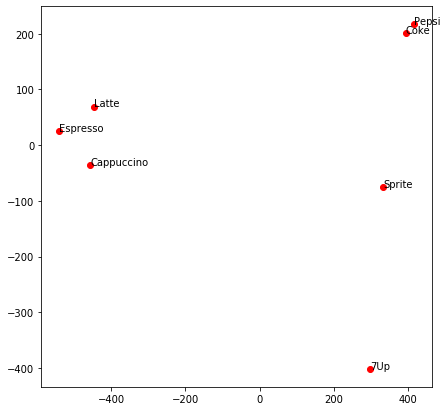

       Coke     Pepsi       7Up    Sprite     Latte  Espresso  Cappuccino
0  1.000000  0.616062  0.491677  0.570642  0.277807  0.199250    0.140735
1  0.616062  1.000000  0.460241  0.540599  0.177285  0.114409    0.180004
2  0.491677  0.460241  1.000000  0.539839  0.255465  0.193757    0.174528
3  0.570642  0.540599  0.539839  1.000000  0.269688  0.239021    0.253089
4  0.277807  0.177285  0.255465  0.269688  1.000000  0.548601    0.396419
5  0.199250  0.114409  0.193757  0.239021  0.548601  1.000000    0.447165
6  0.140735  0.180004  0.174528  0.253089  0.396419  0.447165    1.000000
